In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data\API_SH.ALC.PCAP.LI_DS2_en_csv_v2_5872483.csv')

In [3]:
data = data.drop(data.columns[1:4], axis=1).drop(data.columns[-1:], axis=1)

In [4]:
data.loc[data['Country Name'].isin(['France', 'Czechia', 'Estonia', 'United States', 'South Africa'])]

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
54,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.21968,NaN,NaN,NaN,13.28805,NaN,NaN,NaN
71,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.05872,NaN,NaN,NaN,11.26302,NaN,NaN,NaN
77,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.72756,NaN,NaN,NaN,11.30123,NaN,NaN,NaN
251,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.48589,NaN,NaN,NaN,9.56731,NaN,NaN,NaN
263,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.88007,NaN,NaN,NaN,8.76621,NaN,NaN,NaN


In [5]:
melted_data = pd.melt(data.loc[data['Country Name'].isin(['France', 'Czechia', 'Estonia', 'United States', 'South Africa'])], id_vars=['Country Name'], var_name='Year', value_name='Alcohol consumption')

In [6]:
melted_data

,Country Name,Year,Alcohol consumption
0,Czechia,1960,NaN
1,Estonia,1960,NaN
2,France,1960,NaN
3,United States,1960,NaN
4,South Africa,1960,NaN
...,...,...,...
310,Czechia,2022,NaN
311,Estonia,2022,NaN
312,France,2022,NaN
313,United States,2022,NaN


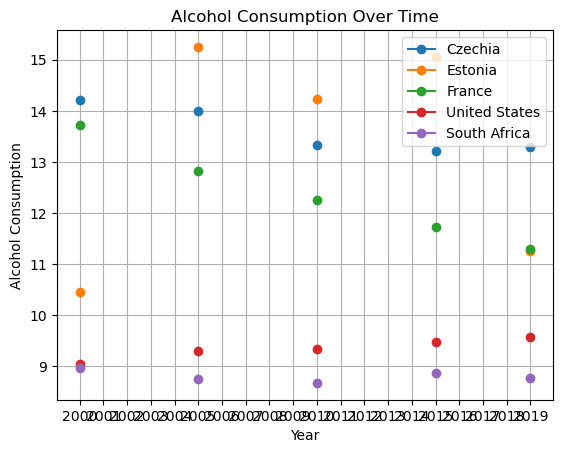

In [7]:
for country in melted_data['Country Name'].unique():
    temp_data = melted_data[melted_data['Country Name']==country]
    plt.plot(temp_data['Year'], temp_data['Alcohol consumption'],'-o', label=country)

plt.title('Alcohol Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Alcohol Consumption')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
melted_no_nan = melted_data.dropna()

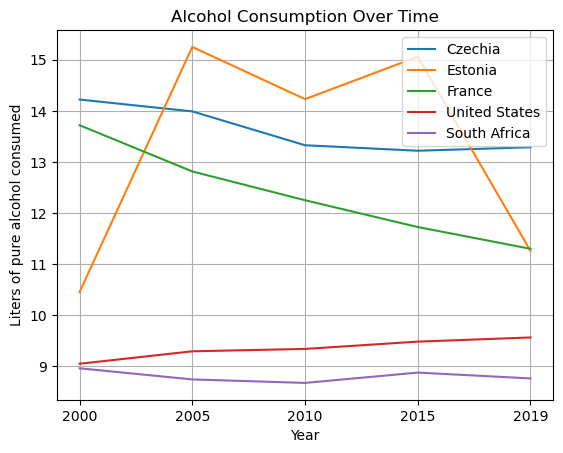

In [9]:
for country in melted_no_nan['Country Name'].unique():
    temp_data = melted_no_nan[melted_no_nan['Country Name']==country]
    plt.plot(temp_data['Year'], temp_data['Alcohol consumption'], label=country)
plt.title('Alcohol Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Liters of pure alcohol consumed')
plt.legend()
plt.grid(True)
plt.show()

## California

In [10]:
df_cali = pd.read_csv('data\AlcohBevABTPerCapCons.csv')

In [11]:
df_cali

,Fiscal Year From,Fiscal Year To,Population,Per Capita Beer Consumption (Gallons),Per Capita Wine Consumption (Gallons),Per Capita Distilled Spirits Consumption (Gallons)
0,2021,2022,39185605,17.96,4.07,1.96
1,2020,2021,39466855,17.82,3.65,1.81
2,2019,2020,39782870,16.97,3.66,1.54
3,2018,2019,39927315,16.90,3.83,1.59
4,2017,2018,39809693,17.49,3.66,1.54
...,...,...,...,...,...,...
62,1955,1956,13292000,14.52,2.05,1.58
63,1950,1951,10886000,15.38,1.96,1.84
64,1945,1946,9452000,16.86,2.13,2.37
65,1940,1941,7094000,10.71,2.51,1.60


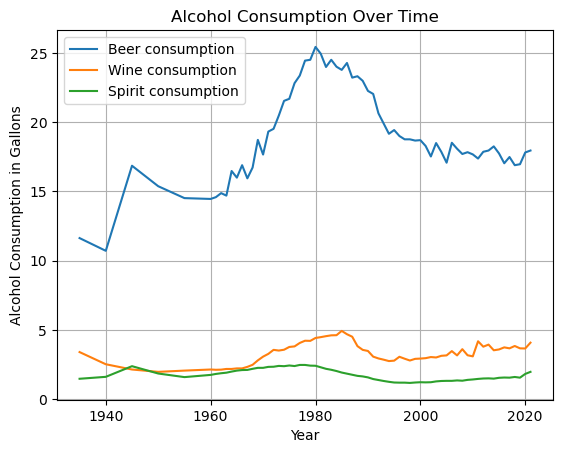

In [12]:
plt.plot(df_cali['Fiscal Year From'], df_cali['Per Capita Beer Consumption (Gallons)'], label='Beer consumption')
plt.plot(df_cali['Fiscal Year From'], df_cali['Per Capita Wine Consumption (Gallons)'], label='Wine consumption')
plt.plot(df_cali['Fiscal Year From'], df_cali['Per Capita Distilled Spirits Consumption (Gallons)'], label='Spirit consumption')
plt.title('Alcohol Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Alcohol Consumption in Gallons')
plt.legend()
plt.grid(True)
plt.show()